# 컴퓨터 비전을 위한 고급 딥러닝

## 세 가지 주요 컴퓨터 비전 작업
![](https://drek4537l1klr.cloudfront.net/chollet2/Figures/09-01.png)





## 이미지 분할 예제
이미지 분할은 각 필셀별로 분류를 수행하는 task이다. 2가지 주요한 sub task로 나눌 수 있는 데 아래 그림과 같이 의미론적 분할(Semantic segmentation)과 개체 분할(Instance segmentation)이 있다.
![](https://drek4537l1klr.cloudfront.net/chollet2/Figures/09-02.png)
- 의미론적 분할은 여러 마리의 고양이를 단지 의미적으로 고양이로만 분류한다면
- 개체 분할은 각각의 고양이를 서로 다른 객체(Instance)로 구분하여 분류한다.

여개서는 [Oxford-IIIT Pets dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/)을 이용하여 의미론적 분할을 수행하겠다. 각 픽셀에 대한 리벨값은 다음과 같이 :
1. foreground(전경) : 찾고자 하는 객체에 속하는 픽셀
2. background(배경) : 관심있는 객체와 무관한 픽셀
3. contour(구분선) : 전경과 배경을 구분하는 분리선의 픽셀

학습 파일을 다운로드하고 압축해제 하면:

In [ ]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
!tar -xf images.tar.gz
!tar -xf annotations.tar.gz

--2023-07-07 04:20:37--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz [following]
--2023-07-07 04:20:38--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz [following]
--2023-07-07 04:20:38--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 301 Moved Perman

In [ ]:
%ls images

Abyssinian_100.jpg*                 keeshond_186.jpg*
Abyssinian_100.mat                  keeshond_187.jpg*
Abyssinian_101.jpg*                 keeshond_188.jpg*
Abyssinian_101.mat                  keeshond_189.jpg*
Abyssinian_102.jpg*                 keeshond_18.jpg*
Abyssinian_102.mat                  keeshond_190.jpg*
Abyssinian_103.jpg*                 keeshond_191.jpg*
Abyssinian_104.jpg*                 keeshond_192.jpg*
Abyssinian_105.jpg*                 keeshond_193.jpg*
Abyssinian_106.jpg*                 keeshond_194.jpg*
Abyssinian_107.jpg*                 keeshond_195.jpg*
Abyssinian_108.jpg*                 keeshond_196.jpg*
Abyssinian_109.jpg*                 keeshond_197.jpg*
Abyssinian_10.jpg*                  keeshond_198.jpg*
Abyssinian_110.jpg*                 keeshond_199.jpg*
Abyssinian_111.jpg*                 keeshond_19.jpg*
Abyssinian_112.jpg*                 keeshond_1.jpg*
Abyssinian_113.jpg*                 keeshond_200.jpg*
Abyssinian_114.jpg*             

In [ ]:
%ls annotations/

list.txt  README  test.txt  trainval.txt  trimaps/  xmls/


In [ ]:
!cat annotations/README

OXFORD-IIIT PET Dataset
-----------------------
Omkar M Parkhi, Andrea Vedaldi, Andrew Zisserman and C. V. Jawahar

We have created a 37 category pet dataset with roughly 200 images for each class. 
The images have a large variations in scale, pose and lighting. All images have an 
associated ground truth annotation of breed, head ROI, and pixel
level trimap segmentation.

Contents:
--------
trimaps/ 	Trimap annotations for every image in the dataset
		Pixel Annotations: 1: Foreground 2:Background 3: Not classified
xmls/		Head bounding box annotations in PASCAL VOC Format

list.txt	Combined list of all images in the dataset
		Each entry in the file is of following nature:
		Image CLASS-ID SPECIES BREED ID
		ID: 1:37 Class ids
		SPECIES: 1:Cat 2:Dog
		BREED ID: 1-25:Cat 1:12:Dog
		All images with 1st letter as captial are cat images while
		images with small first letter are dog images.
trainval.txt	Files describing splits used in the paper.However,
test.txt	you are encouraged to try ra

### 데이터 포맷
PASCAL VOC 데이터 포맷을 사용하고 있다.
- http://host.robots.ox.ac.uk/pascal/VOC/voc2012/htmldoc/devkit_doc.html#SECTION00035000000000000000
- https://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/poster.pdf

### annotations 폴더의 이해
- list.txt는 모든 데이터들의 리스트가 적혀있다. 첫 몇줄에 #주석이 있다.
- trainval.txt, test.txt는 주석없이 각 라인별 filename class_id species_id breed_id 주석이 있다.
    - filename은 대문자로 시작하면 고양이, 소문자면 개
    - class_id : 1-37
    - species_id: 1은 고양이, 2는 개
    - bread_id: 고양이는 1-25, 개는 1-12
- trimaps : semantic segmentation ground truth label이 있다.
- xmls: PASCAL VOC format의 object detection용 ground truth bounding box label이 있다.

In [ ]:
!head -n 20 annotations/test.txt

Abyssinian_201 1 1 1
Abyssinian_202 1 1 1
Abyssinian_204 1 1 1
Abyssinian_205 1 1 1
Abyssinian_206 1 1 1
Abyssinian_207 1 1 1
Abyssinian_20 1 1 1
Abyssinian_210 1 1 1
Abyssinian_212 1 1 1
Abyssinian_213 1 1 1
Abyssinian_215 1 1 1
Abyssinian_216 1 1 1
Abyssinian_217 1 1 1
Abyssinian_219 1 1 1
Abyssinian_21 1 1 1
Abyssinian_220 1 1 1
Abyssinian_221 1 1 1
Abyssinian_223 1 1 1
Abyssinian_224 1 1 1
Abyssinian_225 1 1 1


In [ ]:
!cat annotations/README

OXFORD-IIIT PET Dataset
-----------------------
Omkar M Parkhi, Andrea Vedaldi, Andrew Zisserman and C. V. Jawahar

We have created a 37 category pet dataset with roughly 200 images for each class. 
The images have a large variations in scale, pose and lighting. All images have an 
associated ground truth annotation of breed, head ROI, and pixel
level trimap segmentation.

Contents:
--------
trimaps/ 	Trimap annotations for every image in the dataset
		Pixel Annotations: 1: Foreground 2:Background 3: Not classified
xmls/		Head bounding box annotations in PASCAL VOC Format

list.txt	Combined list of all images in the dataset
		Each entry in the file is of following nature:
		Image CLASS-ID SPECIES BREED ID
		ID: 1:37 Class ids
		SPECIES: 1:Cat 2:Dog
		BREED ID: 1-25:Cat 1:12:Dog
		All images with 1st letter as captial are cat images while
		images with small first letter are dog images.
trainval.txt	Files describing splits used in the paper.However,
test.txt	you are encouraged to try ra

#### annotations/trimaps의 이해
filename.png 파일의 리스트가 있다.
- 1: object pixel
- 2: background pixel
- 3: object segmentation line

In [ ]:
# !head -n 20 annotations/trimaps/
%ls annotations/trimaps/

Abyssinian_100.png*                 keeshond_187.png*
Abyssinian_101.png*                 keeshond_188.png*
Abyssinian_102.png*                 keeshond_189.png*
Abyssinian_103.png*                 keeshond_18.png*
Abyssinian_104.png*                 keeshond_190.png*
Abyssinian_105.png*                 keeshond_191.png*
Abyssinian_106.png*                 keeshond_192.png*
Abyssinian_107.png*                 keeshond_193.png*
Abyssinian_108.png*                 keeshond_194.png*
Abyssinian_109.png*                 keeshond_195.png*
Abyssinian_10.png*                  keeshond_196.png*
Abyssinian_110.png*                 keeshond_197.png*
Abyssinian_111.png*                 keeshond_198.png*
Abyssinian_112.png*                 keeshond_199.png*
Abyssinian_113.png*                 keeshond_19.png*
Abyssinian_114.png*                 keeshond_1.png*
Abyssinian_115.png*                 keeshond_200.png*
Abyssinian_116.png*                 keeshond_20.png*
Abyssinian_117.png*              

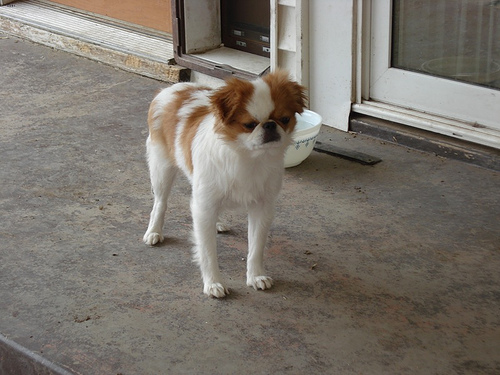

In [ ]:
from IPython.display import Image
# Image('annotations/trimaps/japanese_chin_193.png') # 픽셀값이 적어서 까만색
Image('images/japanese_chin_93.jpg')

In [ ]:
# from google.colab import files
# files.download('annotations/trimaps/japanese_chin_193.png')
import numpy as np
import cv2
img = cv2.imread('annotations/trimaps/japanese_chin_193.png')
print(img.shape)
print(img[:5, :5])
vals, counts = np.unique(img.ravel(), return_counts=True)
rates = counts/counts.sum()

import pandas as pd
tmp = pd.DataFrame({'pixelval':vals, 'count':counts, 'ratio':rates})
tmp['objectness'] = tmp['pixelval'].map({1:'object', 2:'background', 3:'구분선'})
tmp

(328, 500, 3)
[[[2 2 2]
  [2 2 2]
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  [2 2 2]
  [2 2 2]]]


,pixelval,count,ratio,objectness
0,1,68259,0.138738,object
1,2,382185,0.776799,background
2,3,41556,0.084463,구분선


In [ ]:
%ls images/japanese_chin_19*

images/japanese_chin_190.jpg*  images/japanese_chin_196.jpg*
images/japanese_chin_191.jpg*  images/japanese_chin_197.jpg*
images/japanese_chin_192.jpg*  images/japanese_chin_198.jpg*
images/japanese_chin_193.jpg*  images/japanese_chin_199.jpg*
images/japanese_chin_194.jpg*  images/japanese_chin_19.jpg*
images/japanese_chin_195.jpg*


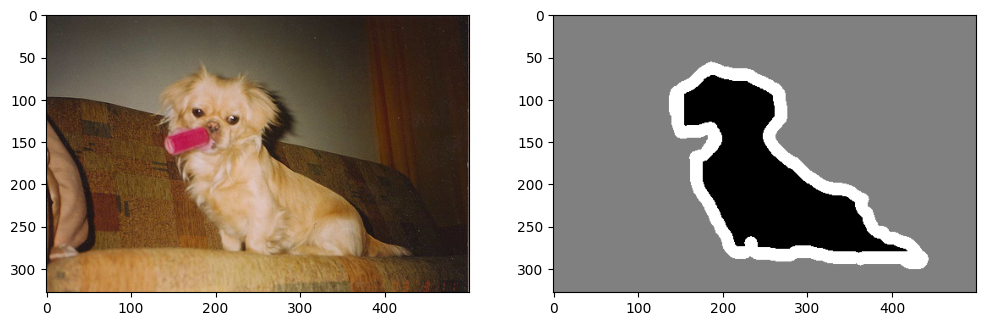

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
plt.imshow(mpimg.imread('images/japanese_chin_193.jpg'))
plt.subplot(1, 2, 2)
img = cv2.imread('annotations/trimaps/japanese_chin_193.png')
img = (img[..., 0] - 1) / 2  # [..., 0] = [:, :, 0]
plt.imshow(img, cmap='gray')

개 털에 대한 라벨링이 일관되지 못한 문제를 가지고 있다.

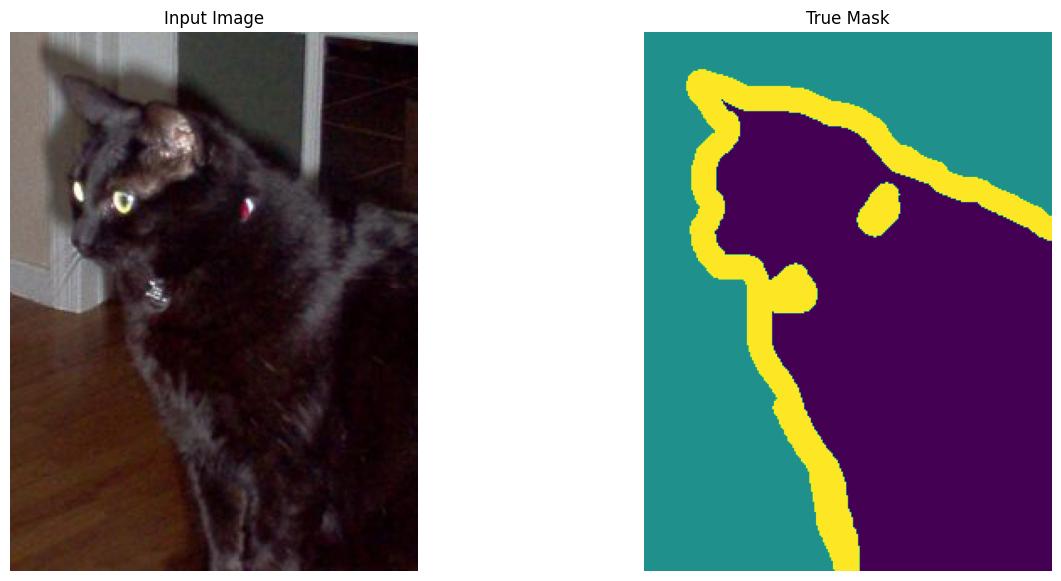

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
def display(display_list):
  plt.figure(figsize=(15, 7))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    # plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
    plt.imshow(display_list[i])
    plt.axis('off')
  plt.show()

# sample_image = mpimg.imread('images/japanese_chin_193.jpg')
# sample_mask = mpimg.imread('annotations/trimaps/japanese_chin_193.png')
sample_image = mpimg.imread('images/Bombay_98.jpg')
sample_mask = mpimg.imread('annotations/trimaps/Bombay_98.png')
display([sample_image, sample_mask])

#### annotations/xmls의 이해
- 모두 xml 파일만 존재한다.
- images 에 있는 모든 파일에 대한 object detection BB label이 있는 것은 아니다.
    - 예: japanese_chin_193.xml 파일은 존재하지 않는다.
- 여러 object tag로 object에 대한 BB와 class정보, pose정보를 제공한다.
    - BB는 좌상단의 좌표(xmin, ymin)와 우하단의 좌표(xmax, ymax)로 표현된다.
- truncated: 객체가 잘려진 상태. 즉, 이미지의 객체 전체를 담고 있는 않은 상태
- occluded: 객체가 다른 객체 또는 백그라운드에 가리운 상태.


In [ ]:
!pip install xmltodict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%cd annotations/xmls
%pwd

/content/annotations/xmls


'/content/annotations/xmls'

In [ ]:
!ls | grep -v '\.xml$'

In [ ]:
%cd ../../
%pwd
%ls

/content
annotations/  annotations.tar.gz  images/  images.tar.gz  sample_data/


In [ ]:
import xmltodict
# %ls annotations/xmls/
# !cat annotations/xmls/japanese_chin_190.xml
with open('annotations/xmls/japanese_chin_190.xml') as f:
    xmlstr = f.read()
    bblabel = xmltodict.parse(xmlstr)

print(xmlstr)

<annotation><folder>OXIIIT</folder><filename>japanese_chin_190.jpg</filename><source><database>OXFORD-IIIT Pet Dataset</database><annotation>OXIIIT</annotation><image>flickr</image></source><size><width>333</width><height>500</height><depth>3</depth></size><segmented>0</segmented><object><name>dog</name><pose>Frontal</pose><truncated>0</truncated><occluded>0</occluded><bndbox><xmin>89</xmin><ymin>55</ymin><xmax>241</xmax><ymax>222</ymax></bndbox><difficult>0</difficult></object></annotation>



In [ ]:
from google.colab import files
files.download('annotations/xmls/japanese_chin_190.xml')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 데이터 열기

In [ ]:
import os

input_dir = "images/"
target_dir = "annotations/trimaps/"

input_img_paths = sorted(
    [os.path.join(input_dir, fname)
     for fname in os.listdir(input_dir)
     if fname.endswith(".jpg")])
target_paths = sorted(
    [os.path.join(target_dir, fname)
     for fname in os.listdir(target_dir)
     if fname.endswith(".png") and not fname.startswith(".")])
len(input_img_paths), len(target_paths)

(7390, 7390)

입력이미지와 라벨이 순서대로 짝 맞추어 정렬되어 있다.

In [ ]:
fnames = pd.DataFrame({'input':input_img_paths, 'target':target_paths})
tmp = fnames.copy()
np.all(tmp.input.map(lambda x: x.split('/')[-1][:-4]) ==
       tmp.target.map(lambda x: x.split('/')[-1][:-4]))

True

짤이 맞는 이미지와 라벨을 각각 열어서 잘 라벨링 되어 있는 지 확인한다.

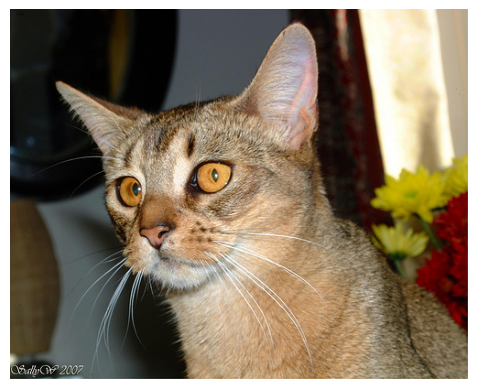

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

plt.axis("off")
# plt.imshow(load_img(input_img_paths[9]))
plt.imshow(load_img(input_img_paths[10]))

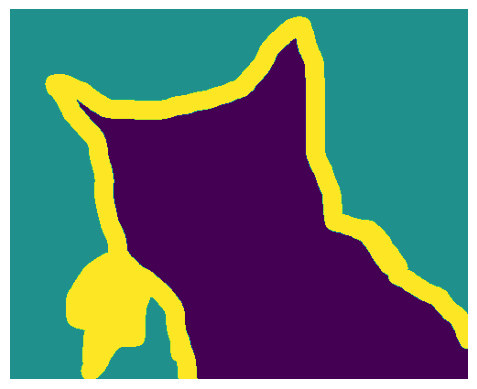

In [ ]:
def display_target(target_array):
    normalized_array = (target_array.astype("uint8") - 1) * 127
    plt.axis("off")
    plt.imshow(normalized_array[:, :, 0])

img = img_to_array(load_img(target_paths[10], color_mode="grayscale"))
display_target(img)

In [ ]:
img.shape

(404, 500, 1)

7390 개의 이미지와 라벨을 모두 읽어 들여, numpy array로 만들고, 이를 train과 val으로 쪼갠다.

In [ ]:
import numpy as np
import random

img_size = (200, 200)
num_imgs = len(input_img_paths)

random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_paths)

# return.shape = (h, w, c) = (200, 200, 3)
def path_to_input_image(path):
    return img_to_array(load_img(path, target_size=img_size))

# img.shape = (h, w, 1) = (200,200,1): 타겟 밸류 0,1,2 => 0,1,2를 예측해야 함
def path_to_target(path):
    img = img_to_array(
        load_img(path, target_size=img_size, color_mode="grayscale"))
    img = img.astype("uint8") - 1
    return img

input_imgs = np.zeros((num_imgs,) + img_size + (3,), dtype="float32")
targets = np.zeros((num_imgs,) + img_size + (1,), dtype="uint8")
for i in range(num_imgs):
    input_imgs[i] = path_to_input_image(input_img_paths[i])
    targets[i] = path_to_target(target_paths[i])

num_val_samples = 1000
train_input_imgs = input_imgs[:-num_val_samples]
train_targets = targets[:-num_val_samples]
val_input_imgs = input_imgs[-num_val_samples:]
val_targets = targets[-num_val_samples:]

참고: Conv2DTranspose
- https://zzsza.github.io/data/2018/02/23/introduction-convolution/

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))
    x = layers.Rescaling(1./255)(inputs)

    x = layers.Conv2D(64, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(128, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(256, 3, strides=2, padding="same", activation="relu")(x)
    x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)

    x = layers.Conv2DTranspose(256, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(256, 3, activation="relu", padding="same", strides=2)(x)
    x = layers.Conv2DTranspose(128, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(128, 3, activation="relu", padding="same", strides=2)(x)
    x = layers.Conv2DTranspose(64, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(64, 3, activation="relu", padding="same", strides=2)(x)

    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    model = keras.Model(inputs, outputs)
    return model

model = get_model(img_size=img_size, num_classes=3)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       147584    
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 256)       295168

실행전 불필요한 객체들 정리 필요. 수행시간 약 30분

In [ ]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")

callbacks = [
    keras.callbacks.ModelCheckpoint("oxford_segmentation.keras",
                                    save_best_only=True)
]

history = model.fit(train_input_imgs, train_targets,
                    epochs=50,
                    callbacks=callbacks,
                    batch_size=64,
                    validation_data=(val_input_imgs, val_targets))

Epoch 1/50
100/100 [==============================] - 102s 777ms/step - loss: 0.9393 - val_loss: 0.8812
Epoch 2/50
100/100 [==============================] - 63s 626ms/step - loss: 0.8866 - val_loss: 0.8298
Epoch 3/50
100/100 [==============================] - 62s 623ms/step - loss: 0.8326 - val_loss: 0.7985
Epoch 4/50
100/100 [==============================] - 62s 623ms/step - loss: 0.8117 - val_loss: 0.7766
Epoch 5/50
100/100 [==============================] - 62s 623ms/step - loss: 0.7833 - val_loss: 0.7823
Epoch 6/50
100/100 [==============================] - 62s 624ms/step - loss: 0.7648 - val_loss: 0.7541
Epoch 7/50
100/100 [==============================] - 62s 624ms/step - loss: 0.7459 - val_loss: 0.7086
Epoch 8/50
100/100 [==============================] - 62s 624ms/step - loss: 0.7394 - val_loss: 0.7002
Epoch 9/50
100/100 [==============================] - 62s 624ms/step - loss: 0.7055 - val_loss: 0.6568
Epoch 10/50
100/100 [==============================] - 62s 624ms/step - 

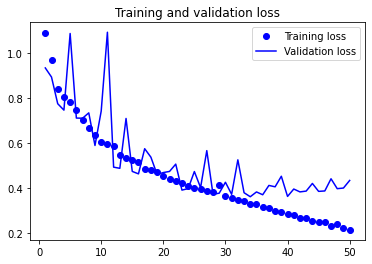

In [ ]:
epochs = range(1, len(history.history["loss"]) + 1)
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

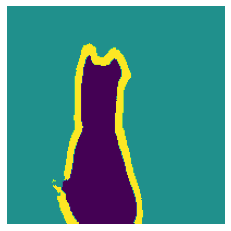

In [ ]:
from tensorflow.keras.utils import array_to_img

model = keras.models.load_model("oxford_segmentation.keras")

i = 4
test_image = val_input_imgs[i]
plt.axis("off")
plt.imshow(array_to_img(test_image))

# 모델 batch 단위로 데이터 입력
mask = model.predict(np.expand_dims(test_image, 0))[0]

def display_mask(pred):
    mask = np.argmax(pred, axis=-1)
    mask *= 127
    plt.axis("off")
    plt.imshow(mask)

display_mask(mask)